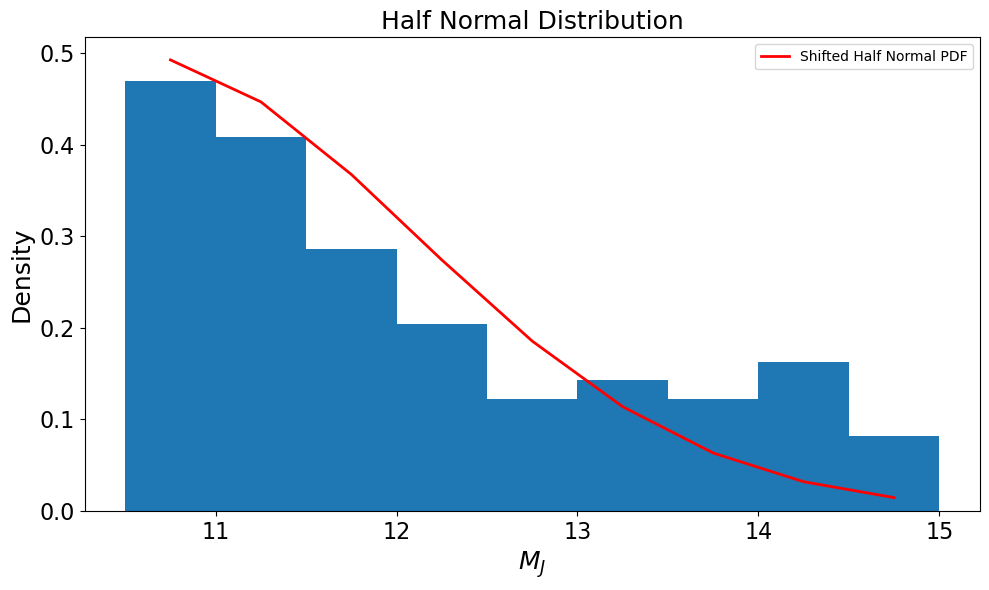

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, powerlaw, pareto, halfnorm


fig, ax = plt.subplots(figsize=(10, 6))
# Parameters
shift_amount = 10.5  # Amount to shift the distribution to the right

shifted_halfnorm = halfnorm(loc=shift_amount, scale=1.6)

# Values and Frequencies
x = np.array([10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75])
counts = np.array([23, 20, 14, 10, 6, 7, 6, 8, 4])

# Plotting
bin_edges = np.arange(10.5, 15.5, 0.5, dtype=float)

# Combine frequencies and values into one array
data = np.empty(np.sum(counts))
i = 0
while i<counts.size:
    j=0
    while j<counts[i]:      
        data[i] = x[i]
        j+=1
    i+=1

plt.plot(x, shifted_halfnorm.pdf(x), 'r-', lw=2, label='Shifted Half Normal PDF')
plt.hist(x, bin_edges, weights=counts, range=(0.0, 3.0), density=True)

plt.title('Half Normal Distribution', fontsize=18)
plt.xlabel("$M_J$", fontsize=18)
plt.ylabel('Density', fontsize=18)
ax.tick_params(axis='both', labelsize=16)
plt.legend(loc='best')
plt.tight_layout()
fig.savefig(fname="half-norm.png", dpi=600)
plt.show()

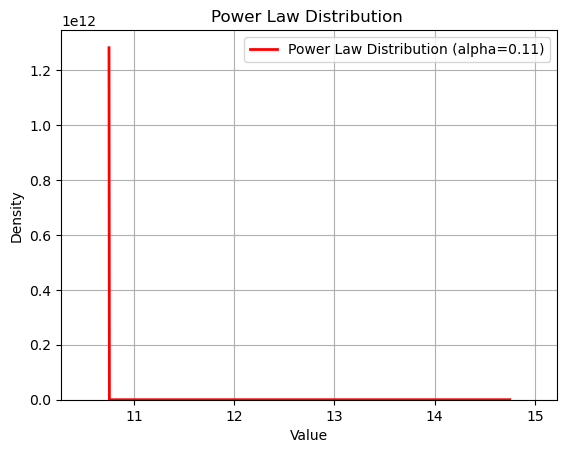

In [10]:
# Values and Frequencies
bin_edges = np.linspace(10.5, 15, 10)
counts = np.array([23, 20, 14, 10, 6, 7, 6, 8, 4])

midpoints = 0.5*(bin_edges[:-1]+bin_edges[1:])
data = np.repeat(midpoints, counts)

# Fit power law distribution
params = powerlaw.fit(data)
dist = powerlaw(*params)
alpha = params[0]  

# Histogram data
plt.hist(midpoints, bin_edges, weights=counts, range=(0.0, 3.0), density=True)

x = np.linspace(min(midpoints), max(midpoints), 1000)
pdf_fit = dist.pdf(x)

# Plot the fitted power law distribution
plt.plot(x, pdf_fit, 'r-', lw=2, label=f'Power Law Distribution (alpha={alpha:.2f})')

plt.title('Power Law Distribution ')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()